## 개요

- 머신러닝을 위한 와인 품질 데이터를 탐색하고 분석하는 방법을 살펴본다. 
- 단순 선형 회귀의 특징을 살펴본다. 
- 다중 선형 회귀의 특징을 살펴본다. 
- 다항 회귀의 특징을 살펴본다. 

## 와인 품질 데이터의 탐색

### 와인 품질 데이터 개요

- 관측값: 총 6,497건 (레드와인: 1,599건, 화이트 와인: 4,898건)
- 입력변수: 12개 
- 출력변수: 1개 (와인 품질 평가 점수, 가장 낮은 품질 1점 ~ 10점)

#### 출력변수는 연속형(숫자형)일까? 이산형(범주형)일까? 
- 연속형일경우 회귀의 문제가 되는 것이고 범주형일 경우 분류의 문제가 되는 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)

In [3]:
redwine["type"] = "red"
redwine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
redwine.shape

(1599, 13)

In [5]:
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)

In [6]:
whitewine["type"] = "white"
whitewine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [7]:
wine = redwine.append(whitewine)

In [8]:
wine.shape

(6497, 13)

In [10]:
wine.columns = wine.columns.str.replace(" ","_")

In [11]:
wine.describe() 
# 연속형 데이터에 대한 요약 통계량 
# 통계량: 표본에 대한 변량의 측정값 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
wine.quality.describe()
# Series 객체의 describe 함수를 이용한 수치형 변수의 요약통계 출력

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [16]:
sorted(wine.quality.unique()) # 오룸차순

[3, 4, 5, 6, 7, 8, 9]

In [12]:
wine.quality.value_counts() # 전체적으로 점수 분포 확인 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [13]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


#### 와인 종류별 품질의 사분위수

In [20]:
wine.groupby("type")["quality"].quantile([0,0.25, 0.5, 0.75,1]).unstack("type")
# unstack("type") 데이터 프레임으로 만들기 , type이 열 

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


In [18]:
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


### 와인 종류별 품질의 분포

In [24]:
import seaborn as sns 
# 분포플롯(distplot) 등 편리하게 사용할 수 있는 플롯이 많음

In [26]:
red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

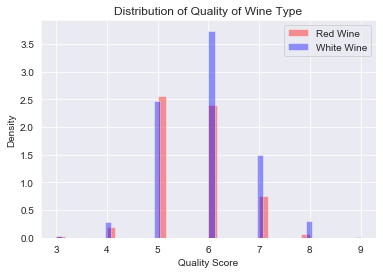

In [29]:
sns.set_style("darkgrid")
sns.distplot(red_q,norm_hist=True, kde=False, color="red",label="Red Wine") # kerneldistribution=False
sns.distplot(white_q,norm_hist=True, kde=False, color="blue",label="White Wine")
plt.title("Distribution of Quality of Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend();

### 와인 종류별 품질 차이의 통계적 유의성 검정 

#### 통계적 유의성 검정 

- 귀무가설 정의 : 와인 종류별 품질의 차이가 없다 
- 표본추출 
- 통계 기법을 통한 검정 : P-value <0.05: 평균 차이가 있다, P-value > 0.05: 평균 차이가 없다(귀무가설 채택)
- 귀무 가설 기각/채택 

- 모집단이 2개이므로(red, white) t-test 해야함 (3개 이상일 경우 = ANOVA)

In [30]:
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [31]:
import statsmodels.api as sm

# 통계적 접근을 하는 라이브러리 : scipy.stats, statsmodels.api

sm.stats.ttest_ind(red_q, white_q)[1] <= 0.05

True

In [32]:
t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
# df (degree of freedom) 밀도 함수를 그릴 때 함수의 기울기 
"t_stat:{:.3f}, p_value:{:.4f}".format(t_stat,p_value) # 4f 소수점 아래 4자리까지 출력 
#  p_value:0.0000 이므로 평균의 차이가 있다. 

't_stat:-9.686, p_value:0.0000'

### 상관 분석

- 상관이 없으면 0에 가까움
- 상관이 있으면 1(양의 상관관계) 또는 -1(음의 상관관계)에 가까움 


In [33]:
wine_corr = wine.corr() 
wine_corr.loc[(np.abs(wine_corr["quality"]) > 0.3) & (np.abs(wine_corr["quality"] != 1)), "quality"]

density   -0.305858
alcohol    0.444319
Name: quality, dtype: float64

In [34]:
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [35]:
wine_corr.loc[wine_corr['quality']>0,"quality"]

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

- 양의 상관관계가 가장 큰 것 알코올

In [36]:
wine_corr.loc[wine_corr['quality']>0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485
alcohol,-0.095452,-0.037640,-0.010493,-0.359415,-0.256916,-0.179838,-0.265740,-0.686745,0.121248,-0.003029,1.000000,0.444319
quality,-0.076743,-0.265699,0.085532,-0.036980,-0.200666,0.055463,-0.041385,-0.305858,0.019506,0.038485,0.444319,1.000000


In [37]:
wine_corr.loc[wine_corr['quality']<0,"quality"]

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

- 음의 상관관계가 가장 큰 것 밀도

In [38]:
wine_corr.loc[np.abs(wine_corr['quality'])<1,"quality"]

fixed_acidity          -0.076743
volatile_acidity       -0.265699
citric_acid             0.085532
residual_sugar         -0.036980
chlorides              -0.200666
free_sulfur_dioxide     0.055463
total_sulfur_dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
Name: quality, dtype: float64

### 산점도 행렬

- 스캐터 플롯을 이용해 데이터 준비 

In [42]:
import numpy as np

In [40]:
red_sample=wine.loc[wine['type']=='red',:]
white_sample=wine.loc[wine['type']=='white',:]

In [44]:
# scatter는 200~ 300개의 데이터일 때 제대로 역할을 할 수 있다 그 이상이 되면 좀 어려움 
red_idx = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

In [46]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx,])
wine_sample.head()
# 산점도를 깔끔하게 그리기 위해 여러 기능 변수와 관련된 데이터를 사용하는 경우 데이터 사이즈 조절이 필요함 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1,5,red
1092,7.0,0.540,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5,6,red
1076,9.9,0.320,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6,red
916,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5,red
1418,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5,red


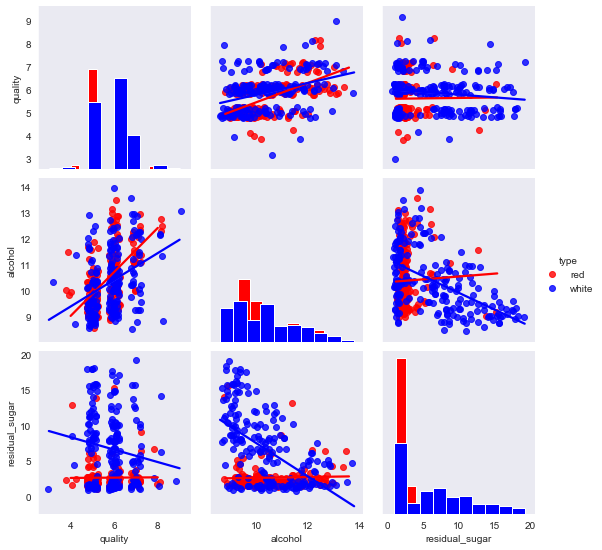

In [50]:
sns.set_style("dark")
sns.pairplot(wine_sample,vars=["quality",'alcohol','residual_sugar'],
            kind="reg",plot_kws={"ci":False, "x_jitter":0.25,"y_jitter":0.25},
            diag_kind="hist",diag_kws={"bins":10,"alpha":1},
            hue="type",palette=dict(red="red",white="blue",markers=["o","s"]))
# pairplot은 스캐터 플롯과 히스토그램 둘다 그리는 것 
# kind 에 regression을 지정하면 회귀선과 관련된 부분을 표시해서 전체적인 경향성 파악 가능 

In [51]:
# 히스토그램 -> 알코올 도수의 평균과 표준편차는 두 그룹이 비슷함. 잔여당의 평균과 표준편차는 화이트 와인이 더 큼
# 회귀선 -> 알코올 도수가 증가하면 품질이 높아짐. 잔여당이 증가하면 품질이 낮아짐 

## 실습 1

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# 레드와인과 관련된 데이터 프레임 만들기 
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";", header=0)

In [55]:
redwine["type"] = "red"
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [56]:
redwine.shape

(1599, 13)

In [57]:
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";", header=0)

In [58]:
whitewine["type"] = "white"
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [59]:
wine = redwine.append(whitewine)
# shift + tap : parameters의 옵션을 확인할 수 있음

In [60]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [61]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [62]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [63]:
wine.groupby("type")["quality"].quantile([0.25, 0.5, 0.75]).unstack("type")

type,red,white
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0


### 와인 종류별 t검정

In [64]:
wine.groupby("type")["quality"].aggregate(["std", "mean"])
# aggregate function 그룹별 집합 함수에 대한 결과 얻기 

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [65]:
import statsmodels.api as sm

In [66]:
red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

In [67]:
sm.stats.ttest_ind(red_q, white_q)[1] <= 0.05

True

In [68]:
sm.stats.ttest_ind(red_q, white_q)
# t통계량 , p-value, 열 개수
# 귀무가설 기각: 레드 와인과 화이트 와인의 품질에 차이가 있다 

(-9.685649554187696, 4.888069044201508e-22, 6495.0)

In [69]:
wine_corr = wine.corr()
wine_corr.loc[(np.abs(wine_corr["quality"]) > 0.3) & (np.abs(wine_corr["quality"] != 1)), "quality"]

density   -0.305858
alcohol    0.444319
Name: quality, dtype: float64

## 단순선형회귀
### 개요 
- 회귀의 목표는 연속형 반응 변수의 값을 예측하는 것
- 단순 선형 회귀란 설명 변수인 단일 특징과 단일 반응 변수 간에 선형 관계가 있다고 가정하고 초평면이라고 하는 선형 평면을 이용해 모델링한 것
- 단순 회귀는 설명 변수의 차원과 반응 변수의 차원, 모두 2개의 차원을 가지며, 초평면은 한차원 낮은 1차원이 됨(1차원의 초평면은 선) 

### 최소제곱법
- OLS(Ordinary Least Squares) 또는 LLS(Linear Least Squares)로 부름 
- 단순 선형 회귀에서 모델을 최적화하는 파라미터 값을 훈련 데이터로부터 학습하는 방법
- 단순 선형 회귀 모델의 최적화 파라미터 값을 정하기 위해 최소 제곱법 이용
- 비용함수: 손실함수. 모델의 오차를 정의하고 측정하기 위해 사용
- 잔차: residual. 훈련 오차로 훈련 데이터의 관측 값과 모델에 의한 예측 값의 차이
- 예측 오차: prediction error. 테스트 오차로 테스트 데이터의 관측 값과 모델에 의한 예측값의 차이 
- 잔차의 합을 최소화 -> 값을 예측할 수 있는 추정기(estimater)를 만들 수 있음

### 비용함수를 사용한 모델의 적합화 척도: RSS
- 반응 변수의 예측 값이 훈련 데이터의 관측값과 가까워지면(차이가 0에 가까워진다) 모델이 적합화되었다고 할 수 있음
- 모델 적합화의 척도: 잔차 제곱 합(RSS. residual sum of squares)

### 단순 선형 회귀를 위한 OLS 의 계산
- 단순 선형 회귀식 : y=알파 + 베타x
- 비용함수를 최소화하는 알파 값과 베타 값을 찾는 것이 목표
- 베타를 계산하기 위해 x의 분산(x값들이 서로 얼마나 떨어져 있냐)과 x와 y의 공분산(x와 y값들이 서로 얼마나 떨어져 있냐)을 계산

### 단순 선형 회귀 모델의 평가
- 회귀 모델의 기본 예측 능력 평가 지표: 결정 계수 R제곱
- 데이터가 회귀선에 얼마나 가깝게 분포하는지를 측정
- 모델에 의해 설명된 반응 변수 분산의 비율을 기술 
- R제곱은 이상치에 민감하고, 모델에 새로운 특징이 추가되면 값이 증가하는 문제를 가짐 -> 회귀모델이 이상치에 민감하다

## 다중 선형 회귀
### 개요
- 다중 선형 회귀란 설명 변수인 다수의 특징과 단일 반응 변수 간에 선형관계가 있다고 가정하고 초평면이라고 하는 선형 평면을 이용해 모델링 한 것
- 다중 회귀는 설명 변수의 n차원과 반응 변수의 1차원, 모두 n+1 개의 차원을 가지며, 초평면은 한 차원 낮은 n차원 됨 

--> 다중선형회귀를 시각화하려면 차원 축소나 아이소맵 같은 기술을 이용해야함 

- 훈련 데이터로 부터 x와 y의 값을 알고 있으므로 비용함수를 최소화하는 베타를 계산
- 행렬 연산에는 나누기가 없으므로 역행렬을 사용해야 하고 역행렬을 사용하려면 역함수를 사용하려면 정방 행렬(전치행렬로 만듬)이어야 함 

- numpy -> 행렬 dot() 역함수 inv() 전치 transpose()

## 다항 회귀
- 다항 회귀란 반응 변수와 다항식으로 표현된 특징 사이의 선형 관계를 모델링 할 수 있는 다중 회귀의 특수한 형태
- 특징을 변환(차수degree변화)한 후 다중 선형 회귀에서와 같은 방식으로 설명 변수와 반응 변수의 비선형 관계를 모델링 함 / 차수가 증가하면 곡선모델(비선형 모델)이 될때 다항 회귀라고 함
- 단일 설명 변수의 단일 특징을 사용하고 있지만 모델의 항으 n개

## 주요 정리
- 선형 회귀 모델을 생성하기에 앞서 상관분석, 산점도 행렬 등을 이용해 데이터에 대한 탐색적 분석을 실행합니다. 
- 단순 선형 회귀란 설명 변수인 단일 특징과 단일 반응 변수 간에 선형 관계가 있다고 가정하고 초평면이라고 하는 선형 평면을 이용해 모델링한 것이다
- 다중 선형 회귀는 설명변수인 다수의 특징과 단일 반응 변수 간에 선형 관계가 있다고 가정하고 초평면이라고 하는 선형 평면을 이용해 모델링 한 것이다
- 다항 회귀는 설명 변수와 반응 변수의 비선형 관계를 모델링 한다
- 회귀 모델 성능의 기본 평가지표는 결정계수 R제곱를 이용해 측정합니다. 